# Regression_Support Vector Machine

In [33]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [2]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 10), (836, 10), (3341,), (836,))

## SVM - regression

In [5]:
from sklearn import svm

clf = svm.SVR()
clf.fit(X_tr, y_tr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
y_pred = clf.predict(X_te)

## Evaluate

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
mean_squared_error(y_te, y_pred)

5.92819953426528

In [9]:
r2_score(y_te, y_pred)

0.471717975483427

## 02_SVM - regression change Regularization factor

In [23]:
from sklearn import svm

clf = svm.SVR(C=1000.0)
clf.fit(X_tr, y_tr)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = clf.predict(X_te)

## Evaluate

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mean_squared_error(y_te, y_pred)

5.0214491628252675

In [27]:
r2_score(y_te, y_pred)

0.5525215852787326

## 02_SVM - choose one column

In [76]:
from sklearn import svm

clf = svm.SVR(kernel='rbf', gamma='auto', verbose=True)
clf.fit(X_tr[:,5].reshape(-1,1), y_tr)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [77]:
y_pred = clf.predict(X_te[:,5].reshape(-1,1))

## Evaluate

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
mean_squared_error(y_te, y_pred)

8.146086290112537

In [80]:
r2_score(y_te, y_pred)

0.2740745428096151

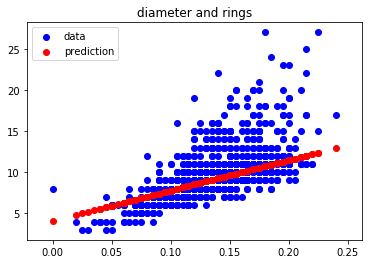

In [81]:
plt.scatter(X_te[:,5], y_te, color='b', label='data')
plt.scatter(X_te[:,5], y_pred, color='r', label='prediction')
plt.legend(loc='upper left')
plt.title('diameter and rings')
plt.show()